#Linear Regression With StatsModels
Linear regression:
# 1- Single linear regression: predict response y based on x

 yˆ ≈  βˆ0   + βˆ1 x, where β0 is intercept, β1 is slope
 β0 & β1 are coefficients /paramaters

 # Estimating coeff:

 f clossness to data points, measured by least squares criteria
 ei   =  yi − yˆi   represents  the  ith  residual
residual sum of squares RSS  =  e1   + e2   + ···+ en , or
RSS = (y1 − βˆ0 − βˆ1 x1 )2 +(y2 − βˆ0 − βˆ1 x2 )2 + ···+(yn − βˆ0 − βˆ1 xn )2

RSS = (yi   − yˆi )2

# Assesing the accuarcy of coeff estimates:
Y    =  β0   + β1 X  + ϵ
β0 , β1
# Assesing the accuarcy of the model:
RSE, R^2 statistic, F-statistic

yi ≈ yi for i =1,...,n small that's mean the model fits the data very well

If ˆyi is very far from yi for one or more observations, then the RSE may be quite large, indicating that the model doesn’t ﬁt the data well.

R^2  = TSS-RSS/TSS = 1 - RSS/TSS
TSS = (yi − y¯)2
R2 measures the proportion of variability in Y that can be explained using X

# 2- Multiple linear regression: predict response y based on x1,x2,..xn
y ≈ β0*1+β1*x1+....βn*xn,
# Estimating coeff:

yˆ =  βˆ0   + βˆ1 x1   + βˆ2 x2   + ···+ βˆp xp
RSS =   ∑ i=1 to n (yi  − yˆi)2
∑ (yi − βˆ0 − βˆ1xi1 − βˆ2xi2 −···−βˆpxip)2
Important questions:
1.    Is   at   least   one   of   the   predictors   X1 ,X2 ,...,Xp     useful   in   predicting the  response?
2.    Do   all   the   predictors   help   to   explain   Y ,   or   is   only   a   subset   of   the predictors  useful?
3.    How  well  does  the  model  ﬁt  the  data?
4.    Given  a  set  of  predictor  values,  what  response  value  should  we  predict, and  how  accurate  is  our  prediction?

F =
(TSS − RSS)/p
/
RSS/(n − p − 1)

In [ ]:
import numpy as np # a third party package allowing us to work with multidimentional arrays
import pandas as pd # package that enhances numpy to orgnize data in a tabular form and to attach descriptive lables to the rows and columns
import scipy # Numpy, pandad, and matplotlib are part of scipy. scipy is ecosystem contains lot of tools for scientific calculations suiatable for field of math, Ml, Eng..
import statsmodels.api as sm # a pakage on top of NumPy and Scipy, which integrates with pandas. SM provides very good summaries
import matplotlib.pyplot as plt # a 2D plotting library specially designed for visualization of NumPy computaions
import seaborn as sns # Python visulization lib based on matplotlib, it provides a high level interface for drawing attractive statistical graphics
#sns.set()  # this method overide the style and graphics of all matplotlib graphs
%matplotlib inline
import sklearn # Widly used ML lib

In [3]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
sales = pd.read_excel('/content/drive/My Drive/DS Material/S&M Analytics/Last S&M Data.xlsx', sheet_name = 'Sales')
#sales

In [94]:
cust = pd.read_excel('/content/drive/My Drive/DS Material/S&M Analytics/Last S&M Data.xlsx', sheet_name = 'Cust')
#cust

In [95]:
mat = pd.read_excel('/content/drive/My Drive/DS Material/S&M Analytics/Last S&M Data.xlsx', sheet_name = 'Material')
#mat

In [96]:
Newdata = pd.merge(sales,cust, on = 'Customer ID')
#Newdata

In [ ]:
Newdata = pd.merge(Newdata,mat, on = 'Material ID')
#Newdata

In [ ]:
Newdata.info()

In [6]:
sm_data = pd.read_excel('/content/drive/My Drive/DS Material/S&M Analytics/Last S&M Data.xlsx', sheet_name = 'S&M data table')
sm_data

,Customer ID,Customer_Name,Customer_Group,Period,PostDate,Year,Material ID,Material_Descriptions,Quantity,Qty_Sales,...,Revenue,Discount,DIS%,Net_Sales,Employee ID,Salesman_Name,Quartar,Purchasing Power,Sales Value,Repetition of purchasing
0,1004891,AABIRNA,Street Pharmacy,Oct,2017-10-11,2017,TFTJ0014TS,Divido D. R. Caps 75Mg,50,50,...,3250.0,0.0,0.0,3250.0,7000198,Anas Saleh Elaagib,Q4,LVC,Low sales,UN REG
1,1004616,ABA NOOB - BAHRI,Street Pharmacy,Feb,2017-02-26,2017,TFCA0014TS,Zinoximor 500 Mg,50,50,...,5650.0,0.0,0.0,5650.0,7000259,Al Khawad Fatah Elrahman El Shazali Ahme,Q1,LVC,Low sales,UN REG
2,1004616,ABA NOOB - BAHRI,Street Pharmacy,Feb,2017-02-26,2017,TFCN0014TS,Meiact 200Mg,5,5,...,700.0,0.0,0.0,700.0,7000259,Al Khawad Fatah Elrahman El Shazali Ahme,Q1,LVC,Low sales,UN REG
3,1004616,ABA NOOB - BAHRI,Street Pharmacy,Feb,2017-02-26,2017,TFMX0014TS,Rapidus 50 Mg Tab,20,20,...,892.0,0.0,0.0,892.0,7000259,Al Khawad Fatah Elrahman El Shazali Ahme,Q1,LVC,Low sales,UN REG
4,1011065,ABA YAZEID PHARMACY,Street Pharmacy,Aug,2017-08-10,2017,TFCA0014TS,Zinoximor 500 Mg,5,5,...,678.0,0.0,0.0,678.0,7000284,Mohammed Mustafa Almgrabi,Q3,LVC,Low sales,UN REG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,1004078,ZONE PHARMCY - KHARTOUM,Street Pharmacy,Oct,2017-10-11,2017,TFTJ0014TS,Divido D. R. Caps 75Mg,100,100,...,6500.0,0.0,0.0,6500.0,7000198,Anas Saleh Elaagib,Q4,LVC,Low sales,REG
2955,1004078,ZONE PHARMCY - KHARTOUM,Street Pharmacy,Feb,2017-02-23,2017,TFMX0014TS,Rapidus 50 Mg Tab,100,100,...,4460.0,0.0,0.0,4460.0,7000284,Mohammed Mustafa Almgrabi,Q1,LVC,Low sales,REG
2956,1004078,ZONE PHARMCY - KHARTOUM,Street Pharmacy,Feb,2017-02-23,2017,TFMX0014TS,Rapidus 50 Mg Tab,10,0,...,0.0,0.0,0.0,0.0,7000284,Mohammed Mustafa Almgrabi,Q1,LVC,Low sales,REG
2957,1007577,ZUHAIR MODERN PHARMACY,Street Pharmacy,Oct,2017-10-16,2017,TFMX0014TS,Rapidus 50 Mg Tab,500,0,...,0.0,0.0,0.0,0.0,7000486,Tarig Ahmed Hassan Malik,Q4,LVC,Low sales,REG


In [7]:
sm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Customer ID                2959 non-null   int64         
 1   Customer_Name              2959 non-null   object        
 2   Customer_Group             2955 non-null   object        
 3   Period                     2959 non-null   object        
 4   PostDate                   2959 non-null   datetime64[ns]
 5   Year                       2959 non-null   int64         
 6   Material ID                2959 non-null   object        
 7   Material_Descriptions      2959 non-null   object        
 8   Quantity                   2959 non-null   int64         
 9   Qty_Sales                  2959 non-null   int64         
 10  Unit price                 2065 non-null   float64       
 11  Revenue                    2959 non-null   float64       
 12  Discou

In [8]:
sm_data.columns

Index(['Customer ID', 'Customer_Name', 'Customer_Group', 'Period', 'PostDate',
       'Year', 'Material ID', 'Material_Descriptions', 'Quantity', 'Qty_Sales',
       'Unit price ', 'Revenue', 'Discount', 'DIS%', 'Net_Sales',
       'Employee ID', 'Salesman_Name', 'Quartar', 'Purchasing Power',
       'Sales Value ', 'Repetition of purchasing '],
      dtype='object')

In [9]:
sm_data[['Revenue']].sum()


Revenue    1.335131e+08
dtype: float64

In [12]:
sm_data.groupby('Material ID')['Net_Sales'].sum()

Material ID
TFAG0014TS    42664664.62
TFAR0014TS     6367428.10
TFCA0014TS    25983884.20
TFCN0014TS    10706697.08
TFMX0014TS    10313636.08
TFNA0014TS     1453855.00
TFTJ0014TS    34180259.60
TFTM0014TS           0.00
Name: Net_Sales, dtype: float64

In [13]:
sm_data.groupby('Customer_Group')['Net_Sales'].sum()

Customer_Group
Chain Pharmacy        5163865.45
Government           30151269.60
Hospitals             4361472.00
Internal Employee           0.00
Polyclinic            4108870.50
Street Pharmacy       4475135.15
Sub Agent            24850748.96
Wholesaler           58525063.02
Name: Net_Sales, dtype: float64

In [14]:
sm_data[['Revenue']].describe()

,Revenue
count,2.959000e+03
mean,4.512101e+04
std,2.183762e+05
min,-1.625572e+06
25%,0.000000e+00
50%,1.300000e+03
75%,1.130000e+04
max,4.634239e+06


In [15]:
sm_data[['Unit price ', 'Revenue', 'Net_Sales', 'Quantity', 'Qty_Sales']].corr()

,Unit price,Revenue,Net_Sales,Quantity,Qty_Sales
Unit price,1.000000,-0.131813,-0.131895,-0.193364,-0.193364
Revenue,-0.131813,1.000000,0.999265,0.847017,0.885219
Net_Sales,-0.131895,0.999265,1.000000,0.849455,0.887709
Quantity,-0.193364,0.847017,0.849455,1.000000,0.958266
Qty_Sales,-0.193364,0.885219,0.887709,0.958266,1.000000


<ipython-input-16-fe95e6cfa1c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sm_data['Net_Sales'])


<Axes: xlabel='Net_Sales', ylabel='Density'>

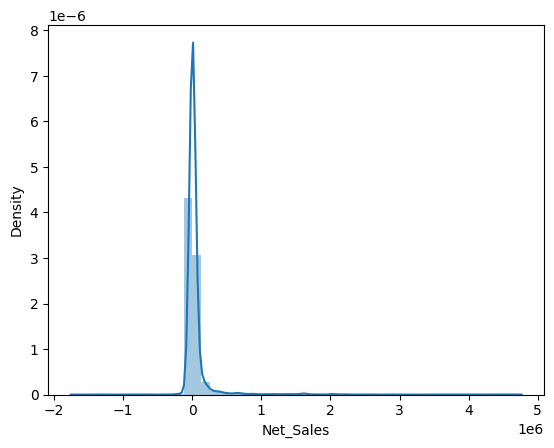

In [16]:
import seaborn as sns
sns.distplot(sm_data['Net_Sales'])

Text(0, 0.5, 'Net_Sales')

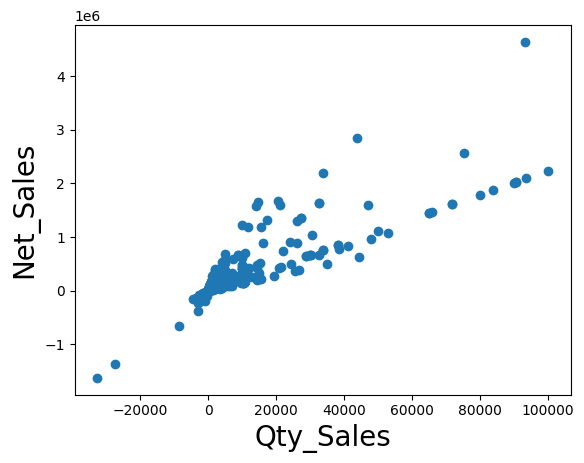

In [23]:
import matplotlib.pyplot as plt

y= sm_data['Net_Sales']
x1= sm_data['Qty_Sales']

plt.scatter(x1,y)
plt.xlabel('Qty_Sales',fontsize=20)
plt.ylabel('Net_Sales',fontsize=20)

In [24]:
# Multiple Regression Model

y = sm_data[['Net_Sales']]
X = sm_data[['Revenue', 'Quantity', 'Qty_Sales']]

In [25]:
x= sm.add_constant(X)          # y=b0*1+b1*x1+b2*x2+....
results= sm.OLS(y,x).fit()  # results will contain output of the ordinary least squares (OLS) regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Net_Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.912e+05
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:18:11   Log-Likelihood:                -30863.
No. Observations:                2959   AIC:                         6.173e+04
Df Residuals:                    2955   BIC:                         6.176e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -327.0696    154.496     -2.117      0.034    -630.000     -24.139
Revenue        0.9813      0.001    661.184      0.000       0.978       0.984
Quantity       0.0131      0.073      0.178      0.859      -0.131       0.157
Qty_Sales      0.4433      0.087      5.081      0.000       0.272       0.614
==============================================================================
Omnibus:                     7912.351   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        202040606.841
Skew:                         -31.488   Prob(JB):                         0.00
Kurtosis:                    1281.575   Cond. No.                     2.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Net_Sales = -327.0696 + 0.9813 * Revenue + 0.0131 * Quantity + 0.4433 * Qty_Sales

In [27]:
# Single Regression Model

y = sm_data[['Net_Sales']]
X = sm_data[['Qty_Sales']]

x= sm.add_constant(X)          # y=b0*1+b1*x1+b2*x2+....
results2= sm.OLS(y,x).fit()  # results will contain output of the ordinary least squares (OLS) regression
results2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Net_Sales   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.099e+04
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:21:46   Log-Likelihood:                -38265.
No. Observations:                2959   AIC:                         7.653e+04
Df Residuals:                    2957   BIC:                         7.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+04   1866.387      5.953      0.000    7451.609    1.48e+04
Qty_Sales     27.9181      0.266    104.847      0.000      27.396      28.440
==============================================================================
Omnibus:                     4069.327   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1893936.383
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                     126.011   Cond. No.                     7.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Net_Sales')

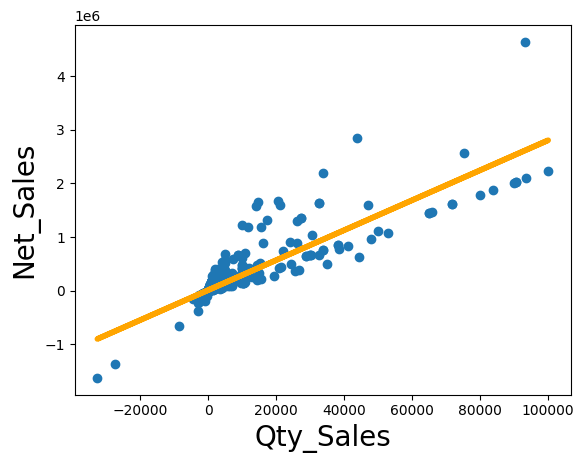

In [29]:
plt.scatter(x1,y)
yhat= 1.111e+04 + 27.9181 * X      # Net_Sales = 1.111e+04 + 27.9181 * Qty_Sales
fig=plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Qty_Sales',fontsize=20)
plt.ylabel('Net_Sales',fontsize=20)

In [30]:
results.predict()

array([ 2884.98286502,  5240.10908452,   362.12414633, ...,
        -326.93900954,  -320.54160287, 54100.95319414])

In [87]:
np.array(sm_data['Net_Sales']) # Actual values

array([ 3250.,  5650.,   700., ...,     0.,     0., 55000.])

In [88]:
new_data = pd.DataFrame({'const': 	-2.19,'Revenue':[3000] ,'Quantity':[50], 'Qty_Sales': [50] })
new_data = new_data[['const','Revenue','Quantity', 'Qty_Sales']]
new_data

,const,Revenue,Quantity,Qty_Sales
0,-2.19,3000,50,50


In [89]:
new_data.rename(index={0: 'First Sales Forcast'})

,const,Revenue,Quantity,Qty_Sales
First Sales Forcast,-2.19,3000,50,50


In [90]:
predictions = results.predict(new_data)
predictions

0    3683.009142
dtype: float64

In [91]:
predictionsdf=pd.DataFrame({'Predictions' :predictions})
joined= new_data.join(predictionsdf)
joined.rename(index={0: 'First Sales Forcast'})

,const,Revenue,Quantity,Qty_Sales,Predictions
First Sales Forcast,-2.19,3000,50,50,3683.009142


# Machine Learning Linear Regression Model

In [64]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [65]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
#  y=b0+b1*x1+b2*x2+...bk*xk

In [66]:
lm.fit(X_train,y_train)

LinearRegression()

In [67]:
print(lm.intercept_)

[7.27595761e-11]


In [68]:
lm.coef_

array([[ 1.18480089e-16,  1.00000000e+00, -3.36536354e-16,
         4.16333634e-17]])

In [71]:
X.columns

Index(['Revenue', 'Net_Sales', 'Quantity', 'Qty_Sales'], dtype='object')

In [73]:
predictions=lm.predict(X_test)

In [74]:
predictions

array([[7.27747203e-11],
       [8.92000000e+03],
       [7.27494801e-11],
       ...,
       [1.20800000e+03],
       [3.86460000e+05],
       [7.27578935e-11]])

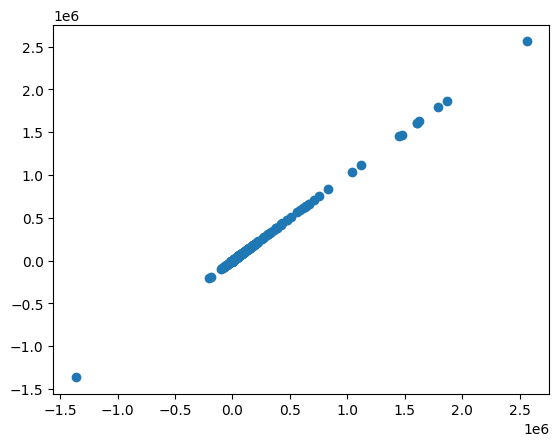

In [75]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

# Evaluation metrics for regression
# MAE,MSE,RMSE

MAE = 1/n ∑ i=1 to n |yi − yˆi|

MSE = 1/n ∑ i=1 to n (yi − yˆi)2

RMSE = √1/n ∑ i=1 to n (yi − yˆi)2

In [77]:
from sklearn import metrics

In [78]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 1.0776392739758574e-10
MSE 7.441549152599246e-20
RMSE 2.7279202980657714e-10
